<a href="https://colab.research.google.com/github/shadeq2022/LLM-Based-Tools-and-Gemini-API-Integration-for-Data-Scientists-Partnership-H8/blob/main/Session4_RAG_Llama_Faiss_H8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -qU langchain-community faiss-cpu langchain-google-genai PyMuPDF langchain-groq langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.3/153.3 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 41.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.9/134.9 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.0/55.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.7/216.7 kB

# Vector Database with Faiss

In [ ]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings
import os

from google.colab import userdata
# masukan API key kalian
api_key= userdata.get('GEMINI')

embedding_model = GoogleGenerativeAIEmbeddings(google_api_key=api_key, model="models/gemini-embedding-exp-03-07")

In [ ]:
import faiss
from langchain_community.docstore.in_memory import InMemoryDocstore
from langchain_community.vectorstores import FAISS

index = faiss.IndexFlatL2(len(embedding_model.embed_query("hello world"))) #untuk mendapatkan length vectornya

# initiate Faiss VectorDB
vector_store = FAISS(
    embedding_function=embedding_model,
    index=index,
    docstore=InMemoryDocstore(),
    index_to_docstore_id={},
)

In [ ]:
# store document to the vector database

from uuid import uuid4

from langchain_core.documents import Document

document_1 = Document(
    page_content="I had chocalate chip pancakes and scrambled eggs for breakfast this morning.",
    metadata={"source": "tweet"},
)

document_2 = Document(
    page_content="The weather forecast for tomorrow is cloudy and overcast, with a high of 62 degrees.",
    metadata={"source": "news"},
)

document_3 = Document(
    page_content="Building an exciting new project with LangChain - come check it out!",
    metadata={"source": "tweet"},
)

document_4 = Document(
    page_content="Robbers broke into the city bank and stole $1 million in cash.",
    metadata={"source": "news"},
)

document_5 = Document(
    page_content="Wow! That was an amazing movie. I can't wait to see it again.",
    metadata={"source": "tweet"},
)

document_6 = Document(
    page_content="Is the new iPhone worth the price? Read this review to find out.",
    metadata={"source": "website"},
)

document_7 = Document(
    page_content="The top 10 soccer players in the world right now.",
    metadata={"source": "website"},
)

document_8 = Document(
    page_content="LangGraph is the best framework for building stateful, agentic applications!",
    metadata={"source": "tweet"},
)

document_9 = Document(
    page_content="The stock market is down 500 points today due to fears of a recession.",
    metadata={"source": "news"},
)

document_10 = Document(
    page_content="I have a bad feeling I am going to get deleted :(",
    metadata={"source": "tweet"},
)

documents = [
    document_1,
    document_2,
    document_3,
    document_4,
    document_5,
    document_6,
    document_7,
    document_8,
    document_9,
    document_10,
]
uuids = [str(uuid4()) for _ in range(len(documents))]

vector_store.add_documents(documents=documents, ids=uuids)

['836de70a-cac9-40ea-8612-3ac3f0982856',
 '610f3a91-1ea2-4d49-a745-567b2a355e29',
 'ddbc928e-50e2-4a64-b1e1-429d7ca0feaa',
 'aa19d96a-4db1-49a0-b8c0-5e9fdb1e9b03',
 '71e86ca2-5f5a-467c-91f7-858a058b48e3',
 '3d4fd888-5044-40b3-bfa0-cd1bfce9d24a',
 'b4f2dc37-ef54-4e81-9f61-454a624f88b8',
 'f1770e86-10ec-420c-87a3-62a2c99ccc52',
 'd325d81d-7cd6-4dd5-a2de-3a70bc379ac6',
 'bb7ae466-de6a-441a-9de1-36cf4046136f']

## Melakukan pencarian di FaissDB

Operator yang didukung untuk melakukan filtering adalah sebagai berikut:

- $eq (equals)

- $neq (not equals)

- $gt (greater than)

- $lt (less than)

- $gte (greater than or equal)

- $lte (less than or equal)

- $in (membership in list)

- $nin (not in list)

- $and (all conditions must match)

- $or (any condition must match)

- $not (negation of condition)

In [ ]:
results = vector_store.similarity_search(
    "LangChain provides abstractions to make working with LLMs easy",
    k=2,
    filter={"source": {"$eq": "tweet"}},
)
for res in results:
    print(f"* {res.page_content} [{res.metadata}]")

* Building an exciting new project with LangChain - come check it out! [{'source': 'tweet'}]
* LangGraph is the best framework for building stateful, agentic applications! [{'source': 'tweet'}]


In [ ]:
results = vector_store.similarity_search(
    "The new iPhone",
    k=2,
)
for res in results:
    print(f"* {res.page_content} [{res.metadata}]")

* Is the new iPhone worth the price? Read this review to find out. [{'source': 'website'}]
* The top 10 soccer players in the world right now. [{'source': 'website'}]


## Save the DB


In [ ]:
vector_store.save_local("faiss_index")

## Load the DB

In [ ]:
new_vector_store = FAISS.load_local(
    "faiss_index", embedding_model, allow_dangerous_deserialization=True
)

docs = new_vector_store.similarity_search("qux")

In [ ]:
for res in docs:
    print(f"* {res.page_content} [{res.metadata}]")

* I have a bad feeling I am going to get deleted :( [{'source': 'tweet'}]
* Building an exciting new project with LangChain - come check it out! [{'source': 'tweet'}]
* LangGraph is the best framework for building stateful, agentic applications! [{'source': 'tweet'}]
* I had chocalate chip pancakes and scrambled eggs for breakfast this morning. [{'source': 'tweet'}]


# RAG dengan LangChain

In [ ]:
from langchain.text_splitter import CharacterTextSplitter
from langchain_core.documents import Document
import fitz


### Langkah 1: Extract document dan chunk dokumen
Chunk ini dilakukan untuk mengubah dokumen yang panjang menjadi bagian bagian kecil sehingga text yang diterima LLM lebih sedikit. Tujuannya adalah karena adanya batasan token yang diberikan oleh LLM, selain itu semakin panjang text yang diterima oleh LLM semakin lama pula respons yang diberikan oleh LLM.

In [ ]:
def extract_text_from_pdf(pdf_path):
    """Mengekstrak teks dari PDF"""
    doc = fitz.open(pdf_path)
    text = "\n".join([page.get_text() for page in doc])
    return text

pdf_text = extract_text_from_pdf("/content/Jurnal Shadeq.pdf")

In [ ]:
document = Document(
    page_content=pdf_text
)

In [ ]:
splitter = CharacterTextSplitter(
    separator="\n",
    chunk_size=1000,
    chunk_overlap=200
)

chunks = splitter.split_text(pdf_text) #you can also split documents using split_documents

In [ ]:
# hasil chunk document

[chunk[:100] + '...' for chunk in chunks]

['CHIPSET - VOL. XX NO. XX (2017) XXX-XXX \n \n \nAvailable online at : http://chipset.fti.unand.ac.id/ \n...',
 'Poor sleep can harm physical and mental health. Sleep apnea, often signaled by snoring and low \nbloo...',
 'precision of 0.806, recall of 0.805, and an F1-score of 0.794. The microphone effectively \ndetected ...',
 'disorders is Obstructive Sleep Apnea (OSA), a condition where \nthe upper airway is repeatedly blocke...',
 'Snoring, caused by the vibration of soft tissues in the upper \nairway, is a primary indicator of OSA...',
 'wearable devices, such as the Galaxy Watch, can monitor SpO2 \nand detect snoring but lack a real-tim...',
 'FIRST AUTHOR / CHIPSET - VOL. XX NO. XX (2017) XXX-XXX \nMuhammad Shadeq \n \nhttps://doi.org/10.25077/...',
 'sleep position, to prevent more serious health risks. \nMETHOD \nThe proposed solution is a wearable e...',
 'Seeedstudio XIAO nRF52840 microcontroller (a) with its \nintegrated PDM microphone (a.1) for capturin...',
 'fingertip. 

### Langkah 2: Upload Chunked Documents ke Database

In [ ]:
# inisialisasi faissdb

index = faiss.IndexFlatL2(len(embedding_model.embed_query("hello world"))) #untuk mendapatkan length vectornya

# initiate Faiss VectorDB
vector_store = FAISS(
    embedding_function=embedding_model,
    index=index,
    docstore=InMemoryDocstore(),
    index_to_docstore_id={},
)

In [ ]:
documents = [Document(page_content=chunk) for chunk in chunks]

In [ ]:
uuids = [str(uuid4()) for _ in range(len(documents))]

vector_store.add_documents(documents=documents, ids=uuids)

['04a93c52-d630-4b63-a6cc-c752faa583b8',
 '80ad1e2e-1147-431e-a6f5-eaff80ad75e4',
 'ea9a6b1d-b7e5-4eba-8cfc-dacbd0bc76ba',
 'be8ff216-9000-475c-8e2d-0bb2fb63d546',
 '3a2c90c0-dd3e-4ed9-9d74-ce06f17c76c4',
 '466a97a3-5405-4957-abf9-a4a273583efa',
 '989eb249-3b3a-4998-8c29-63a0edb7124b',
 'db969dd1-651f-438e-8b43-888210fa8a9f',
 'e94a8667-2641-4fbd-9eb9-159a6c38a89d',
 '17401e4b-ba11-4c9f-a046-9baf22d1f3e2',
 '849d3d17-478c-438d-92c5-0fb13e79693f',
 '5e6db608-acd4-4362-a465-0883ca875e08',
 '9e253b37-4686-4f43-bc76-67f4907737fb',
 '8b3068ca-6453-488a-b6aa-08e29e9f0deb',
 'aac7df84-e768-4fad-8110-4a6b32773370',
 'c32b61bb-dd09-4874-b4b7-33006bb47a15',
 '0c86559c-4799-4ea7-8214-63b27189553b',
 'b33d6ca8-1abf-4767-9d30-e762f532c266',
 '25e55a24-f502-4a91-b12e-281ae22be2a6',
 '71ce275e-c082-4a9b-9259-62c6b1e777f2',
 '3f5d0d1b-3cae-41ac-842d-fbdbdde75567',
 '2d6ad41a-50fb-4aaa-845f-de35ae92c293',
 'a07b427f-6c54-47b2-a4af-8a3ce4d7c7c9',
 'a67f9b40-7d93-4086-ac5d-930c41792629',
 'e0b36c9c-096b-

In [ ]:
vector_store.save_local("faiss_index")

### Langkah 3: Develop RAG

In [ ]:
# Initialize State

from langchain_core.documents import Document
from typing_extensions import List, TypedDict
from langchain_groq import ChatGroq


class State(TypedDict):
    question: str
    context: List[Document]
    answer: str

In [ ]:
#initialize prompt

from langchain import hub

prompt = hub.pull("rlm/rag-prompt")

example_messages = prompt.invoke(
    {"context": "(context goes here)", "question": "(question goes here)"}
).to_messages()

assert len(example_messages) == 1
print(example_messages[0].content)

You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: (question goes here) 
Context: (context goes here) 
Answer:


In [ ]:
api_key= userdata.get('GROK')

# Set API Key ke variable lingkungan yang dibutuhkan
os.environ["GROQ_API_KEY"] = api_key

MODEL = 'llama-3.3-70b-versatile'

llm = ChatGroq(
    temperature=0,
    model_name=MODEL
) # kamu bisa mengganti model menjadi gemini atau LLM lainnya

In [ ]:
# buat logic untuk mengambil informasi dari faissdb dan men-generate jawaban

def retrieve(state: State):
    retrieved_docs = vector_store.similarity_search(state["question"])
    return {"context": retrieved_docs}


def generate(state: State):
    docs_content = "\n\n".join(doc.page_content for doc in state["context"])
    messages = prompt.invoke({"question": state["question"], "context": docs_content})
    response = llm.invoke(messages)
    return {"answer": response.content}

In [ ]:
# intialize flow
from langgraph.graph import START, StateGraph

graph_builder = StateGraph(State).add_sequence([retrieve, generate])
graph_builder.add_edge(START, "retrieve")
graph = graph_builder.compile()

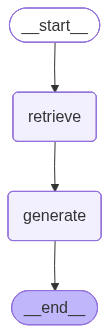

In [ ]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
result = graph.invoke({"question": "According to this document, what methods can be used to detect snoring using a microcontroller?"})

print(f'Context: {result["context"]}\n\n')
print(f'Answer: {result["answer"]}')

Context: [Document(id='80ad1e2e-1147-431e-a6f5-eaff80ad75e4', metadata={}, page_content='Poor sleep can harm physical and mental health. Sleep apnea, often signaled by snoring and low \nblood oxygen (SpO2), involves temporary breathing pauses and can increase the risk of \ncardiovascular disease, stroke, and cognitive problems. This paper presents the design of a \nwearable early warning device consisting of two modules: one for snoring detection using a \nPDM microphone and TinyML-based Neural Network, and another for SpO2 monitoring with \na MAX30102 sensor, providing alerts via vibration, buzzer, or OLED display. Data is \ntransmitted to a smartphone application through BLE for real-time monitoring. Testing showed \nthat the MAX30102 achieved 99.06% accuracy in SpO2 measurement, while the snoring \ndetection model using MFCC features reached accuracy of 80.5% with a weighted average \nprecision of 0.806, recall of 0.805, and an F1-score of 0.794. The microphone effectively \ndetecte

In [ ]:
result = graph.invoke({"question": "Jelaskan secara singkat bagaimana sistem bekerja"})
print(f'Answer: {result["answer"]}')

Answer: Sistem ini bekerja dengan menggunakan dua perangkat yang terhubung melalui BLE (Bluetooth Low Energy). Perangkat pertama (Seeed Studio XIAO nRF52840 Sense) mengcapture sinyal snoring dan mengirimkan data ke perangkat kedua (Seeed Studio XIAO ESP32C3) untuk diproses. Perangkat kedua kemudian mengolah data SpO2 dari sensor MAX30102 dan mengirimkan data ke smartphone melalui BLE untuk pemantauan waktu nyata.
